In [2]:
%matplotlib inline

import csv
import glob
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.  Generate results .tsv files

In [231]:
def summarize(resultsfilename, resultsheader, mode, globformat, optimalresults):
    with open(resultsfilename,"w") as resultsfile:
        resultswriter = csv.writer(resultsfile, delimiter='\t')
        resultswriter.writerow(resultsheader)
        for k in range(1,6):
            for filename in glob.glob(globformat % (k)):
                m = re.search('_(.+?)_summary', filename)
                prefix = m.group(1)
                if mode == "o": 
                    if not prefix in optimalresults:
                        continue
                with open(filename, 'r') as csvfile:
                    csvreader = csv.reader(csvfile, delimiter='\t')
                    for idx, row in enumerate(csvreader):
                        if idx == 0:
                            continue
                        if "CA" in row[0] and mode != "c":
                            row[0] = "CA"
                        elif not "CA" in row[0] and mode == "c":
                            continue
                        m2 = re.search('00_(.+?)_summary', filename)
                        instance = m2.group(1)
                        
                        resultswriter.writerow([instance]+row[:4]+[row[3+k+1]])

In [232]:
def generateoptimal(globformat):
    optimalresults = set()
    for k in range(1,6):
        for filename in glob.glob(globformat % (k)):
    #         print(filename)
            with open(filename, 'r') as csvfile:
                csvreader = csv.reader(csvfile, delimiter='\t')
                for idx, row in enumerate(csvreader):
                    if idx == 0:
                        continue
    #                 print(row[-1],row[-2])
                    if row[-2] == row[-1] and row[0] == "ILP":
#                         print(row[-2], row[-1], filename)
                        m = re.search('_(.+?)_summary', filename)
                        if m:
                            found = m.group(1)
                            optimalresults.add(found)
    return optimalresults

In [233]:
for time in {"600"}:
    globformat = "../results/simulations/*_%d_"+time+"*summary.tsv"
    for mode in {"all"}:
        resultsfilename = "results"+time+mode+".tsv"
        print(resultsfilename)
        m = mode[0]
        optimalresults = None
        if mode == "optimal":
            optimalresults = generateoptimal(globformat)
        summarize(resultsfilename, ['instance','method', 'time', 'k', 'cost', 'num_trees'], m, globformat, optimalresults)

# globformat = "../results/simulations/CA*_%d_*summary.tsv"
# summarize("resultscaonly.tsv", ['method', 'time', 'k', 'cost', 'num_trees'], 'c', globformat, None)

results600all.tsv


In [234]:
globformat = "../results/simulations/*_%d_600*summary.tsv"

len(glob.glob(globformat % (2)))

180

# 2. Plot graphs

## 2.1 All results

In [235]:
small = 10
big = 40

In [267]:
df = pd.read_table("results600all.tsv")
df = df[(df['num_trees'] >= 6)]
df_small = df[(df['num_trees'] <= small)]
df_med = df[(df['num_trees'] > small) & (df['num_trees'] < big)]
df_big = df[df['num_trees'] >= big]

print("#Small instances:", len(df_small[(df_small['k'] == 4) & (df_small['method'] == "ILP")]))
print("#Medium instances:", len(df_med[(df_med['k'] == 4) & (df_med['method'] == "ILP")]))
print("#Big instances:", len(df_big[(df_big['k'] == 4) & (df_big['method'] == "ILP")]))

#Small instances: 16
#Medium instances: 15
#Big instances: 14


In [255]:
# df_small[(df_small['k'] == 5) & (df_small['method'] == "ILP")].sort_values(['instance'])

In [256]:
# df_small[(df_small['k'] == 4) & (df_small['method'] == "ILP")].sort_values(['instance'])

In [257]:
# df_small[(df_small['k'] == 2) & (df_small['method'] == "ILP")]

In [266]:
df.groupby(['k', 'method']).count()

instance  time  cost  num_trees
k method                                 
1 BF            47    47    47         47
  CA            47    47    47         47
  ILP           47    47    47         47
2 BF            47    47    47         47
  CA            47    47    47         47
  ILP           47    47    47         47
3 BF            47    47    47         47
  CA            47    47    47         47
  ILP           47    47    47         47
4 BF            47    47    47         47
  CA            47    47    47         47
  ILP           47    47    47         47
5 BF            47    47    47         47
  ILP           47    47    47         47

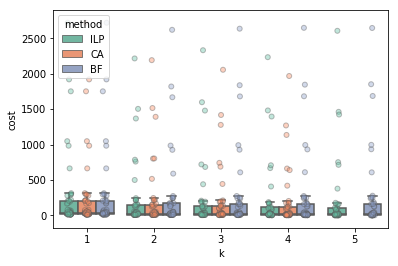

In [263]:
sns.stripplot(data=df, x="k", y="cost", hue="method", alpha=.4, split=True, linewidth=1, jitter=.1, 
              palette=sns.color_palette("Set2", 10))
ax = sns.boxplot(data=df, x="k", y="cost", hue="method", showfliers=False,
                palette=sns.color_palette("Set2", 10))
ax.set(yscale="linear")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:3], labels[0:3], title="method", loc="upper left")
# ax.set_ylim((1, 500))
ax.set_xlabel("k")
ax.set_ylabel("cost")
plt.savefig("solutions.pdf")

## 2.2 Optimal results

In [119]:
df = pd.read_table("results600optimal.tsv")
df_small = df[df['num_trees'] <= 20]
df_med = df[(df['num_trees'] > 20) & (df['num_trees'] <= 100)]
df_big = df[df['num_trees'] > 100]

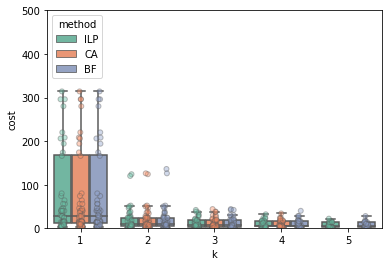

In [123]:
sns.stripplot(data=df, x="k", y="cost", hue="method", alpha=.4, split=True, linewidth=1, jitter=.1, 
              palette=sns.color_palette("Set2", 10))
ax = sns.boxplot(data=df, x="k", y="cost", hue="method", showfliers=False,
                palette=sns.color_palette("Set2", 10))
ax.set(yscale="linear")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:3], labels[0:3], title="method", loc="upper left")
ax.set_ylim((1, 500))
ax.set_xlabel("k")
ax.set_ylabel("cost")
plt.savefig("solutions.pdf")

## 2.3 Coordinate-Ascent only

In [135]:
df = pd.read_table("resultscaonly.tsv")
df_small = df[df['num_trees'] <= 20]
df_med = df[(df['num_trees'] > 20) & (df['num_trees'] <= 100)]
df_big = df[df['num_trees'] > 100]

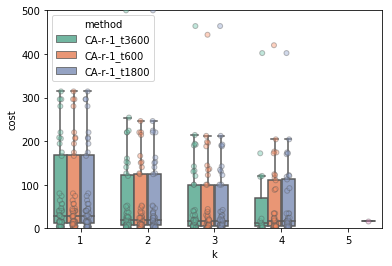

In [138]:
sns.stripplot(data=df, x="k", y="cost", hue="method", alpha=.4, split=True, linewidth=1, jitter=.1, 
              palette=sns.color_palette("Set2", 10))
ax = sns.boxplot(data=df, x="k", y="cost", hue="method", showfliers=False,
                palette=sns.color_palette("Set2", 10))
ax.set(yscale="linear")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:3], labels[0:3], title="method", loc="upper left")
ax.set_ylim((1, 500))
ax.set_xlabel("k")
ax.set_ylabel("cost")
plt.savefig("solutions.pdf")